# Decision Trees 

**Decision Tree** is a supervised machine learning algorithm used for both classification and regression tasks. It models decisions and their possible consequences by splitting the dataset based on certain conditions in a tree-like structure. Each internal node represents a "test" on an attribute (e.g., checking if a customer’s balance is above a certain threshold), each branch represents the outcome of the test, and each leaf node represents a class label (for classification) or a continuous value (for regression).

The Decision Tree algorithm works by recursively splitting the dataset at each node, choosing the feature that leads to the highest reduction in impurity (measured using Gini impurity or Entropy). The goal is to create pure (or nearly pure) leaf nodes where all samples in that leaf belong to the same class.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

In [3]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve
from sklearn.feature_selection import RFE

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score

In [5]:
X_train = pd.read_csv('dataset/X_train_smote.csv.', sep = ';')
y_train = pd.read_csv('dataset/y_train_smote.csv.', sep = ';')
X_test = pd.read_csv('dataset/X_test.csv.', sep = ';')
y_test = pd.read_csv('dataset/y_test.csv.', sep = ';')

In [6]:
print(X_train.shape)
print(y_train.shape)

(38359, 55)
(38359, 1)


In [7]:
print(X_test.shape)
print(y_test.shape)

(6096, 55)
(6096, 1)


## DecisionTree Model

In [9]:
dt = DecisionTreeClassifier(random_state=42)

In [10]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred_dt = dt.predict(X_test)
y_pred_dt_proba = dt.predict_proba(X_test)[:, 1]  

In [12]:
# Evaluate the model
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.8738517060367454
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5309
           1       0.51      0.59      0.55       787

    accuracy                           0.87      6096
   macro avg       0.72      0.75      0.74      6096
weighted avg       0.88      0.87      0.88      6096



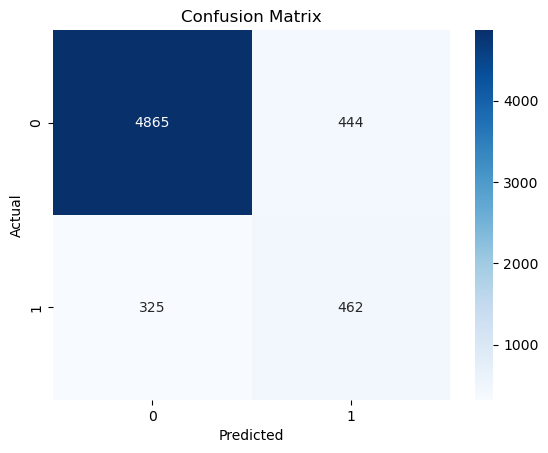

In [13]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [14]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt_proba)

In [15]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_proba)

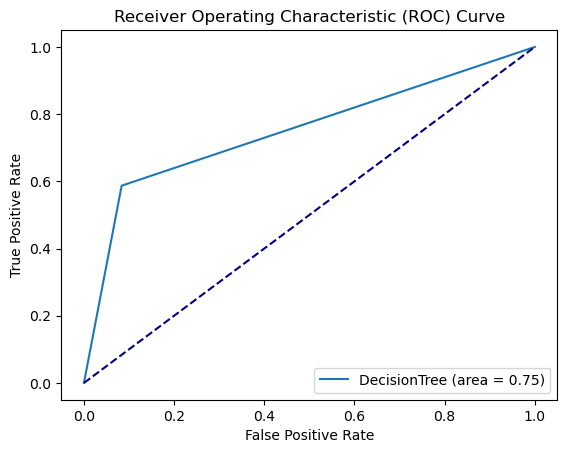

In [16]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='DecisionTree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Feature Importance in DecisionTree

Feature Importance in a decision tree is a score that indicates how useful or valuable a given feature is in constructing the tree. Decision trees calculate feature importance by evaluating how much a feature decreases the impurity (Gini impurity or entropy) across all of the splits in the tree. The greater the decrease, the more important the feature.

In [17]:
# Get feature importance
importances = dt.feature_importances_

In [21]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [22]:
importance_df.head(15)

,Feature,Importance
3,duration,0.446315
1,euribor3m,0.206146
0,age,0.044634
4,cons.conf.idx,0.035152
7,campaign,0.034377
43,month_may,0.020154
6,cons.price.idx,0.014708
45,month_oct,0.013794
48,day_of_week_mon,0.010252
37,month_apr,0.010128


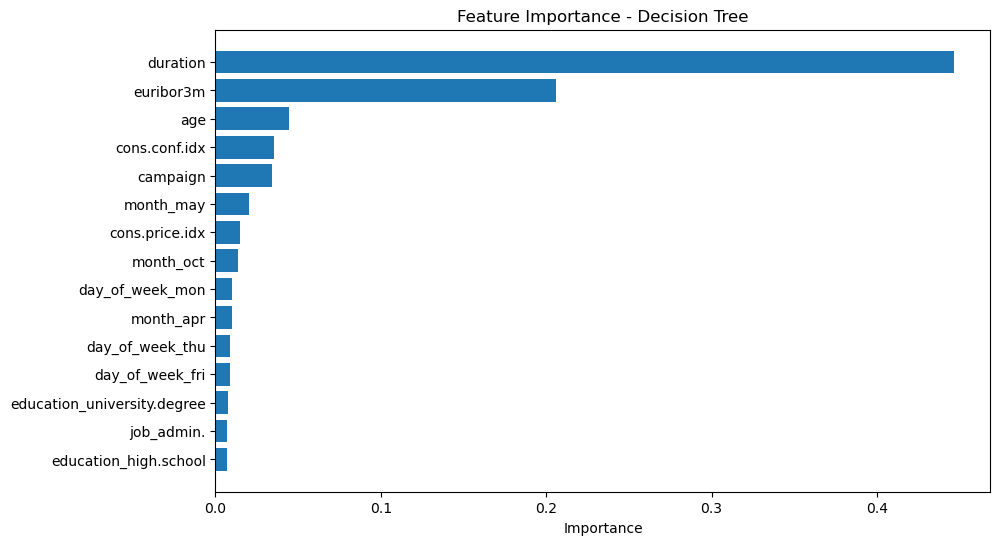

In [24]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(15), importance_df['Importance'].head(15))
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.show()

In [25]:
top_15_features=importance_df.Feature.head(15)

In [26]:
X_train_15 = X_train[top_15_features]
X_test_15 = X_test[top_15_features]

In [27]:
dt.fit(X_train_15, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
y_pred_15 = dt.predict(X_test_15)

In [30]:
y_pred_15_proba = dt.predict_proba(X_test_15)[:, 1]

In [31]:
# Evaluate the model
print("DecisionTree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_15))
print(classification_report(y_test, y_pred_15))

DecisionTree Performance:
Accuracy: 0.8708989501312336
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      5309
           1       0.50      0.59      0.54       787

    accuracy                           0.87      6096
   macro avg       0.72      0.75      0.73      6096
weighted avg       0.88      0.87      0.88      6096



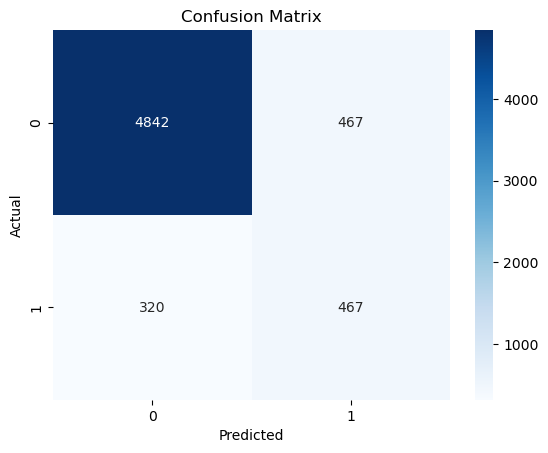

In [32]:
cm = confusion_matrix(y_test, y_pred_15)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
roc_auc_dt = roc_auc_score(y_test, y_pred_15_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_15_proba)

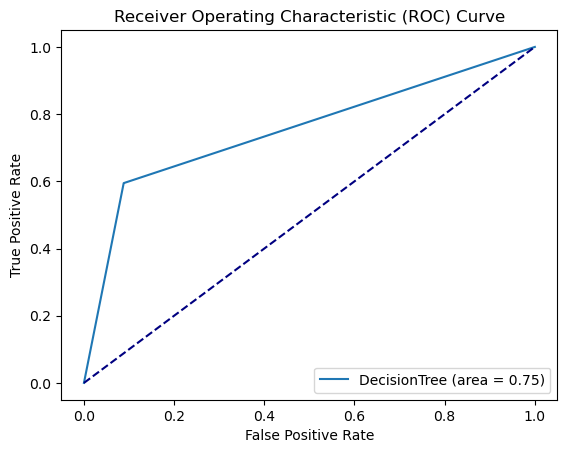

In [35]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='DecisionTree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tuning

Hyperparameter tuning is the process of optimizing the parameters of a model to improve its performance. For decision trees, the most important hyperparameters to tune are:

* **max_depth**: The maximum depth of the tree. Limiting the depth can help prevent overfitting. A deeper tree will learn more patterns from the training data but can overfit.A shallow tree may not learn enough and could underfit.

* **min_samples_split**: The minimum number of samples required to split an internal node. A higher value will result in a more generalized tree (less complex), which can reduce overfitting.

* **min_samples_leaf**: The minimum number of samples required to be at a leaf node. Setting this to a higher value can smooth the model and help avoid overfitting.

* **criterion**: The function to measure the quality of a split (either 'gini' or 'entropy'). Gini impurity tends to be computationally faster, while entropy provides a more information-theoretic view of the splits.

In [36]:
# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, verbose=3, n_jobs=-1)

In [39]:
# Fit GridSearchCV
grid_search.fit(X_train_15, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             verbose=3)

In [40]:
# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [41]:
# Evaluate the best model
best_tree_model = grid_search.best_estimator_

In [43]:
y_pred_best = best_tree_model.predict(X_test_15)
y_pred_best_proba = best_tree_model.predict_proba(X_test_15)[:, 1]

In [44]:
# Evaluate the model
print("DecisionTree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

DecisionTree Performance:
Accuracy: 0.8771325459317585
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5309
           1       0.52      0.68      0.59       787

    accuracy                           0.88      6096
   macro avg       0.73      0.79      0.76      6096
weighted avg       0.89      0.88      0.88      6096



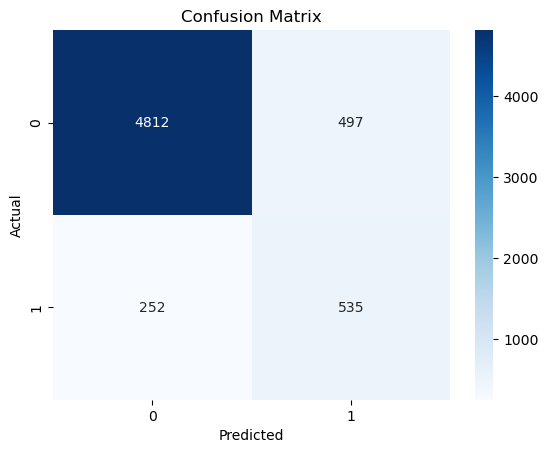

In [45]:
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

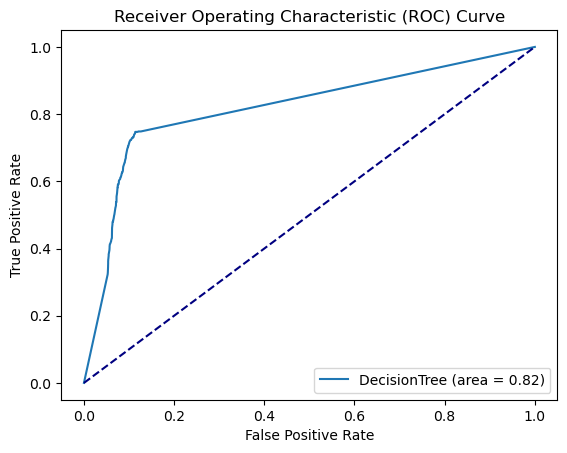

In [46]:
roc_auc_best = roc_auc_score(y_test, y_pred_best_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='DecisionTree (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()